In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import geopandas as gpd

In [2]:
# Importing the dataframe
df = pd.read_csv('C:/Users/jwhoj/Desktop/Capstone_1/KC_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [3]:
# Import King County Shapefile for Zipcode Map 
%matplotlib inline
import geopandas as gpd
kc = gpd.read_file('C:/Users/jwhoj/Desktop/admin/zipcode.shp')
kc = kc[kc.COUNTY == '033']

In [4]:
kc.head()

ZIP ZIPCODE COUNTY  ZIP_TYPE    Shape_area      Shape_len  \
0  98031   98031    033  Standard  2.280129e+08  117508.232813   
1  98032   98032    033  Standard  4.826754e+08  166737.665152   
2  98030   98030    033  Standard  2.000954e+08   94409.538568   
3  98029   98029    033  Standard  2.774247e+08  111093.715481   
4  98028   98028    033  Standard  1.996531e+08   71488.230747   

                                            geometry  
0  POLYGON ((1297645.018999994 162673.5240000039,...  
1  (POLYGON ((1291868.054000005 164132.6790000051...  
2  POLYGON ((1299384.719999999 144186.7479999959,...  
3  POLYGON ((1358323.971000001 215228.4819999933,...  
4  POLYGON ((1297496.656000003 283648.5799999982,...

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#Display all columns instead of "..." truncation
pd.options.display.max_columns = None

#No scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Set plot sizes
plt.rcParams["figure.figsize"] = 10, 10

In [6]:
# Convert house dataframe to geodataframe for plotting 
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
crs = {'init': 'epsg:4269'}
df_geo = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [7]:
kc.to_crs({
           'ellps': 'GRS80',
           'lat_0': 47,
           'lat_1': 47.5,
           'lat_2': 48.73333333333333,
           'lon_0': -120.8333333333333,
           'no_defs': True,
           'proj': 'lcc',
           'towgs84': '0,0,0,0,0,0,0',
           'units': 'm',
           'x_0': 500000.0000000001,
           'y_0': 0}, inplace = True)
kc.to_crs({ 'init': 'epsg:4326'}, inplace = True)

C:\Users\jwhoj\Anaconda3\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysalnext` package. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
C:\Users\jwhoj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


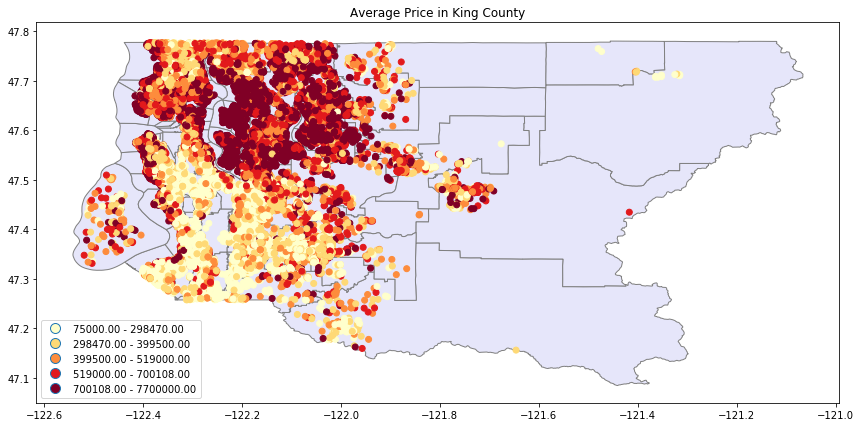

In [8]:
loc = zip(df['long'], df['lat'])
geometry = [Point(xy) for xy in loc]
crs = {'init': 'epsg:4269'}
kc = kc[kc.COUNTY == '033']
price_geo = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
base = kc.plot(color='lavender', edgecolor='grey', figsize=(15, 7))
price_geo.plot(ax=base, column='price', cmap='YlOrRd', figsize=(16,16), scheme='quantiles', legend=True)
plt.title('Average Price in King County')
plt.show()

# Import Bokeh 

In [9]:
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure, ColumnDataSource
output_notebook()

Loading BokehJS ...

In [10]:
def convert_GeoPandas_to_Bokeh_format(gdf):
    """
    Function to convert a GeoPandas GeoDataFrame to a Bokeh
    ColumnDataSource object.
    
    :param: (GeoDataFrame) gdf: GeoPandas GeoDataFrame with polygon(s) under
                                the column name 'geometry.'
                                
    :return: ColumnDataSource for Bokeh.
    """
    gdf_new = gdf.drop('geometry', axis=1).copy()
    gdf_new['x'] = gdf.apply(getGeometryCoords, 
                             geom='geometry', 
                             coord_type='x', 
                             shape_type='polygon', 
                             axis=1)
    
    gdf_new['y'] = gdf.apply(getGeometryCoords, 
                             geom='geometry', 
                             coord_type='y', 
                             shape_type='polygon', 
                             axis=1)
    
    return ColumnDataSource(gdf_new)


def getGeometryCoords(row, geom, coord_type, shape_type):
    """
    Returns the coordinates ('x' or 'y') of edges of a Polygon exterior.
    
    :param: (GeoPandas Series) row : The row of each of the GeoPandas DataFrame.
    :param: (str) geom : The column name.
    :param: (str) coord_type : Whether it's 'x' or 'y' coordinate.
    :param: (str) shape_type
    """
    
     # Parse the geometries and grab the coordinate
    geometry = row[geom]
    #print(geometry.type)

    if geometry.type=='Polygon':
        if coord_type == 'x':
            # Get the x coordinates of the exterior
            # Interior is more complex: xxx.interiors[0].coords.xy[0]
            return list( geometry.exterior.coords.xy[0] )
        elif coord_type == 'y':
            # Get the y coordinates of the exterior
            return list( geometry.exterior.coords.xy[1] )

    if geometry.type in ['Point', 'LineString']:
        if coord_type == 'x':
            return list( geometry.xy[0] )
        elif coord_type == 'y':
            return list( geometry.xy[1] )

    if geometry.type=='MultiLineString':
        all_xy = []
        for ea in geometry:
            if coord_type == 'x':
                all_xy.append(list( ea.xy[0] ))
            elif coord_type == 'y':
                all_xy.append(list( ea.xy[1] ))
        return all_xy

    if geometry.type=='MultiPolygon':
        all_xy = []
        for ea in geometry:
            if coord_type == 'x':
                all_xy.append(list( ea.exterior.coords.xy[0] ))
            elif coord_type == 'y':
                all_xy.append(list( ea.exterior.coords.xy[1] ))
        return all_xy

    else:
        # Finally, return empty list for unknown geometries
        return []

In [11]:
KC_Source = convert_GeoPandas_to_Bokeh_format(kc)

In [12]:
p = figure(title="King County")
p.multi_line('x', 'y', source=KC_Source, color="black", line_width=2)
show(p)

In [13]:
from bokeh.models import (
    Range1d,
    GeoJSONDataSource,
    HoverTool,
    LinearColorMapper,
    GMapPlot, GMapOptions, ColumnDataSource, 
    Circle, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool
)

In [14]:
df.head()

id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221900.000         3      1.000         1180   
1  6414100192  20141209T000000 538000.000         3      2.250         2570   
2  5631500400  20150225T000000 180000.000         2      1.000          770   
3  2487200875  20141209T000000 604000.000         4      3.000         1960   
4  1954400510  20150218T000000 510000.000         3      2.000         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650   1.000           0     0          3      7        1180   
1      7242   2.000           0     0          3      7        2170   
2     10000   1.000           0     0          3      6         770   
3      5000   1.000           0     0          5      7        1050   
4      8080   1.000           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
0              0      1955             0    98178 47.511 -122.257   
1            400      1951          1991    98125 47.721 -122.319   
2              0      1933             0    98028 47.738 -122.233   
3            910      1965             0    98136 47.521 -122.393   
4              0      1987             0    98074 47.617 -122.045   

   sqft_living15  sqft_lot15                  geometry  
0           1340        5650  POINT (-122.257 47.5112)  
1           1690        7639   POINT (-122.319 47.721)  
2           2720        8062  POINT (-122.233 47.7379)  
3           1360        5000  POINT (-122.393 47.5208)  
4           1800        7503  POINT (-122.045 47.6168)

In [15]:
df['x'] = df.apply(getGeometryCoords, 
                                 geom='geometry', 
                                 coord_type='x', 
                                 shape_type='point',
                                 axis=1)
                                 
df['y'] = df.apply(getGeometryCoords, 
                                 geom='geometry', 
                                 coord_type='y', 
                                 shape_type='point',
                                 axis=1)

df = df.drop(['geometry','id','date','view','condition','grade','sqft_above','sqft_basement','yr_renovated','sqft_living15','sqft_lot15'],axis=1)

In [16]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0 221900.000         3      1.000         1180      5650   1.000           0   
1 538000.000         3      2.250         2570      7242   2.000           0   
2 180000.000         2      1.000          770     10000   1.000           0   
3 604000.000         4      3.000         1960      5000   1.000           0   
4 510000.000         3      2.000         1680      8080   1.000           0   

   yr_built  zipcode    lat     long                      x  \
0      1955    98178 47.511 -122.257             [-122.257]   
1      1951    98125 47.721 -122.319             [-122.319]   
2      1933    98028 47.738 -122.233  [-122.23299999999999]   
3      1965    98136 47.521 -122.393  [-122.39299999999999]   
4      1987    98074 47.617 -122.045             [-122.045]   

                      y  
0             [47.5112]  
1  [47.721000000000004]  
2             [47.7379]  
3             [47.5208]  
4             [47.6168]

In [17]:
KC_Source = ColumnDataSource(data=dict(x=df['x'],
                                      y=df['y'],
                                      price=df['price'].values,
                                      bedrooms=df['bedrooms'].values,
                                      bathrooms=df['bathrooms'].values,
                                      sqft_living=df['sqft_living'].values,
                                      sqft_lot=df['sqft_lot'].values,
                                      floors=df['floors'].values,
                                      waterfront=df['waterfront'].values,
                                      yr_built=df['yr_built'].values,
                                      zipcode=df['zipcode'].values,
                                      lat=df['lat'].values,
                                      long=df['long'].values))


In [18]:
TOOLS = "pan,wheel_zoom,box_zoom,reset,hover,save" 

In [19]:
Elevated = figure(title="King County \'House Prices\' ", 
                tools=TOOLS,
                x_axis_location=None, 
                y_axis_location=None)   

In [20]:
Elevated.multi_line('x', 
                    'y', 
                    source=KC_Source, 
                    color="black", 
                    line_width=2)

GlyphRenderer(id='1140', ...)

In [21]:
Elevated.circle('x', 
                'y', 
                source=KC_Source,
                color='red',
                size=4)

GlyphRenderer(id='1147', ...)

In [22]:
hover = Elevated.select_one(HoverTool)
hover.point_policy = "follow_mouse"

In [23]:
hover.tooltips = [
        ("Price", "@price"),
        ("Bedrooms", "@bedrooms"),
        ("Bathrooms", "@bathrooms"),
        ("Sqft_Living", "@sqft_living"),
        ("Sqft_Lot", "@sqft_lot"),
        ("Floors", "@floors"),
        ("Waterfront", "@waterfront"),
        ("Yr_built", "@yr_built"),
        ("Zipcode", "@zipcode"),
        ("(Long, Lat)", "($x, $y)"),
        ]

In [30]:
df.index

RangeIndex(start=0, stop=21613, step=1)

In [24]:
show(Elevated)

In [26]:
## http://michael-harmon.com/blog/IntroToBokeh.html 
